In [54]:
%load_ext autoreload
%autoreload 2

from text3d2video.artifacts.anim_artifact import AnimArtifact


anim = AnimArtifact.create_empty_artifact("animation")
anim.folder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PosixPath('/tmp/local_artifacts/anim/animation')

In [55]:
from pytorch3d.io import load_objs_as_meshes

mesh = load_objs_as_meshes(["data/meshes/mixamo-human.obj"])


In [56]:
from text3d2video.camera_placement import turntable_loop_cameras

cams = turntable_loop_cameras(10)
meshes = mesh.extend(len(cams))

anim.write_frames(cams, meshes)
anim.write_unposed(mesh)

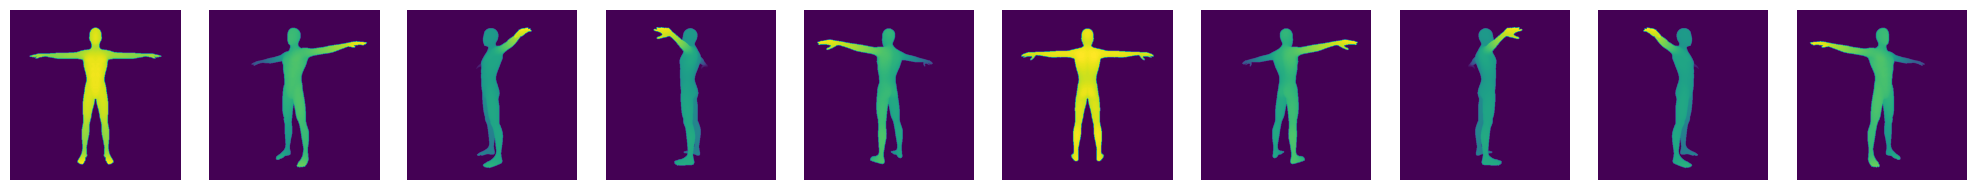

In [57]:
from text3d2video.ipython_utils import display_ims
from text3d2video.rendering import render_depth_map


frames = anim.frame_indices()
unposed = anim.load_unposed_mesh()

cams, meshes = anim.load_frames()

display_ims(render_depth_map(meshes, cams))